In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame, YouTubeVideo
from ipywidgets import interact,fixed
import pandas as pd
from numpy import cos,sin,pi,tan,log,exp,sqrt,array,linspace,arange
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from ipywidgets import interact

plt.rcParams["figure.figsize"] = [7,7]

from numpy.linalg import norm

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\renewcommand{\vec}{\mathbf}$
$\renewcommand{\RR}{\mathbb{R}}$

### Exercises

#### Wheat Production

Wheat production $W$ in a given year depends on the average temperature $T$ and the annual rainfall $R$. Scientists estimate that the average temperature is rising at a rate of $0.15^\circ$C/year and rainfall is decreasing at a rate of $0.1$ cm/year. They also estimate that at current production levels, $\partial W/\partial T = -2$ and $\partial W/\partial R = 8$. 

  1. What is the significance of the signs of these partial derivatives?

##### Solution  

  As temperature goes up, wheat production decreases. More rain, on the other hand, more wheat.
  

#####  
  2. Estimate the current rate of change of wheat production, $dW/dt$.

##### Solution

$$\frac{dW}{dt} = \frac{\partial W}{\partial T}\frac{dT}{dt} + \frac{\partial W}{\partial R}\frac{dR}{dt} = -2(0.15) + 8(-0.1) = -1.1 \text{ wheats} / \text{year}$$

####
<p style="padding-bottom:40%;"> </p>

#### Many Layers
Suppose 
\begin{align} 
z &= z(x,y) \\
x &= x(u,v) \\
y &= y(u,v) \\
u &= u(s,t) \\
v &= v(s,t) \\
\end{align}
are all differentiable. Find an expression for $\frac{\partial z}{\partial s}$.

##### Solution

$$ \frac{\partial z}{\partial s} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial u}\frac{\partial u}{\partial s}
+ \frac{\partial z}{\partial x}\frac{\partial x}{\partial v}\frac{\partial v}{\partial s}
+ \frac{\partial z}{\partial y}\frac{\partial y}{\partial u}\frac{\partial u}{\partial s}
+ \frac{\partial z}{\partial y}\frac{\partial y}{\partial v}\frac{\partial v}{\partial s} $$

####
<p style="padding-bottom:40%;"> </p>

## Example

If $g:\RR\to\RR$ is any smooth function, show that $f(x,y) = g(x^2+y^2)$ is radially symmetric. That is, $\frac{\partial f}{\partial \theta} =0$ 

###### Solution

$$\frac{\partial f }{\partial \theta} = \frac{\partial}{\partial x} (g(x^2 + y^2)) \frac{\partial x}{\partial \theta} 
+ \frac{\partial}{\partial y} (g(x^2 + y^2)) \frac{\partial y}{\partial \theta} $$

$$ = g'(x^2 + y^2)2x (-r \sin \theta) + g'(x^2 + y^2)2y (-r \cos \theta) $$

$$ = g'(x^2 + y^2)( -2xy + 2yx) = 0 $$

####
<p style="padding-bottom:40%;"> </p>

## Example

Find the slope of the tangent line to  

$$ x \sin(y) - \frac12 = \sqrt{2} - 2\cos(xy)$$ at the point $\left(\frac12,\frac\pi2\right)$.

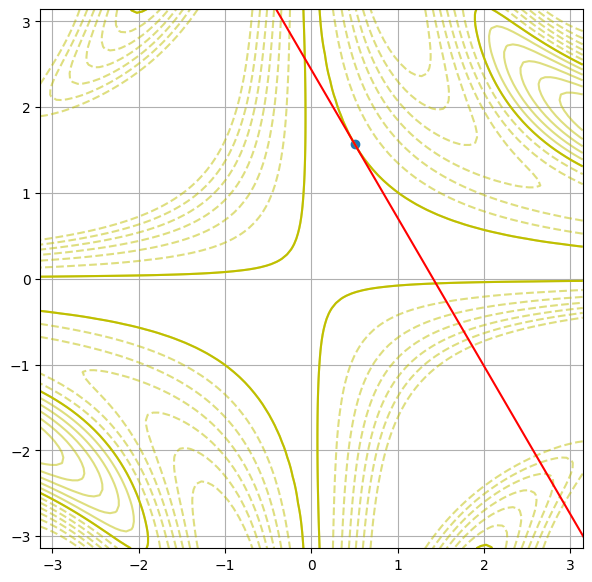

In [2]:
x = y = np.linspace(-pi,pi,102)
x,y = np.meshgrid(x,y)
z = x*sin(y) + 2*cos(x*y) - sqrt(2) - 1/2
plt.figure(figsize=(7,7))

cp = plt.contour(x,y,z,levels=arange(-3,3.4,.5),alpha=.5,colors='y')

cp = plt.contour(x,y,z,levels=[0],colors='y')
# plt.clabel(cp,fmt="%d");
x = np.linspace(-2.5,3.5,102)
plt.plot(x,pi/2 + (x-1/2) * (sqrt(2) - pi),color='r');
plt.grid(True)
plt.scatter(1/2,pi/2)
plt.xlim(-pi,pi)
plt.ylim(-pi,pi);

###### Solution

$$F(x,y) = x \sin y + 2\cos(xy) = \frac12 + \sqrt 2 $$

$$ \frac{dy}{dx} = \left.-\frac{F_x}{F_y} \right\rvert_{(1/2,\pi/2)} = \left.-\frac{\sin y -2\sin(xy)y}{x\cos y -2 \sin(xy)x}\right\rvert_{(1/2,\pi/2)} $$

$$ = - \frac{1 - \frac{\pi}{\sqrt2}}{-\frac{1}{\sqrt2}} = \sqrt2 - \pi $$

#### 
<p style="padding-bottom:40%;"> </p>

### Example

Differentiate the function $$f(t) = \int_0^t e^{-tx^2}dx.$$

##### Solution

This is a funny example as it is ostensibly a one-variable calculus problem. $x$ is just a dummy variable so the only variable to differentiate here is $t$, but you are not likely to find this example in a Calculus 1 text. 

In [3]:
@interact
def _(t = (0.,3.,0.05)):
    x = np.linspace(0,3,200)
    plt.plot(x,exp(-x**2),label = "$e^{-x^2}$")
    plt.plot(x,exp(-t*x**2),label = "$e^{-tx^2}$")
    y = np.array([0] + list(np.linspace(0,t,150)) + [t])
    z = exp(-t*y**2)
    z[0] = 0
    z[-1] = 0
    plt.fill(y,z)

    plt.legend();

interactive(children=(FloatSlider(value=1.5, description='t', max=3.0, step=0.05), Output()), _dom_classes=('w…

We cannot only apply the Fundamental Theorem of Calculus here directly as $t$ appears in both the limits and the integrand. So instead, we define 

$$F(a,b) = \int_0^a e^{-bx^2}dx$$

to separate those roles and then realize $f(t) = F(t,t)$ so we apply the chain rule

$$f'(t) = F_a(t,t) + F_b(t,t)$$ where of course here $\frac{da}{dt} = 1 = \frac{db}{dt}$. The first partial is computed via FTC and the second by differentiating under the integral sign. And thus,

$$f'(t) = e^{-t^3} + \int_0^t (-x^2)e^{-tx^2}\,dx $$



which is not beautiful but can be evaluated to arbitrary precision. 

In [4]:
from scipy.integrate import quad

def fprime(t):
    val = quad(lambda x: (-x**2)*exp(-t*x**2),0,t)[0]
    return exp(-t**3) + val

fprime(1)

0.17840709535094998

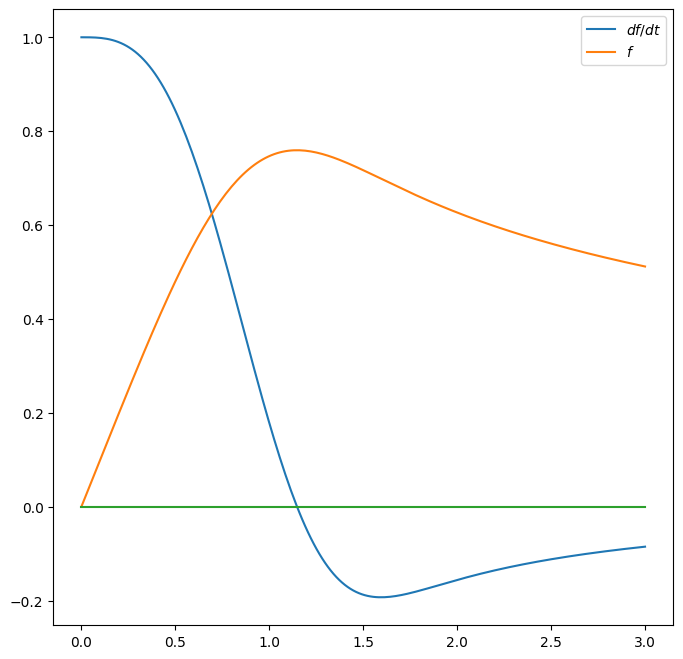

In [5]:
t = np.linspace(0,3,200)
plt.figure(figsize=(8,8))
plt.plot(t, [fprime(tt) for tt in t],label="$df/dt$")
plt.plot(t, [quad(lambda x: exp(-tt*x**2),0,tt)[0] for tt in t],label="$f$")
plt.legend();
plt.plot(t, 0*t);